In [1]:
import os
import numpy as np
import scipy.spatial.distance as sd
import matplotlib.pyplot as plt
from tesser import util
import pandas as pd
from tesser import sr
from tesser import tasks
from tesser import util
from tesser import rsa
from tesser import network
from tesser import fit_limsr
import importlib
from scipy.spatial import distance
from scipy import stats
import seaborn as sns

#! pip list

## Load data for all subjects

In [2]:
#Work path
data_dir = '/Users/athula/Dropbox/Experiments/tesser_successor/Data'

#Laptop path
#data_dir = '/Users/athulapudhiyidath/Dropbox/Experiments/tesser_successor/Data'

struct = util.load_struct(data_dir)
induct = util.load_induct(data_dir)
all_induct_bias = tasks.induct_bias_all(data_dir)

## Fit each individual subject

In [3]:
struct_info = network.temp_node_info()
adjacency = network.adjacency_mat(struct_info)
fixed = {}
var_names = ['gamma', 'tau'] 
var_bounds = {'gamma': [0, 1], 'tau': [0, 1]}
results = fit_limsr.fit_induct_indiv_limsr(adjacency, induct, fixed, var_names, var_bounds)

Estimating parameters for 100...
Estimating parameters for 101...


/Users/athula/Dropbox/Experiments/tesser_successor/tesser_successor/tesser/fit_limsr.py:45: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((SR[cue, opt[response]] ** tau) /
/Users/athula/Dropbox/Experiments/tesser_successor/tesser_successor/tesser/fit_limsr.py:46: RuntimeWarning: invalid value encountered in double_scalars
  (SR[cue, opt[0]] ** tau + SR[cue, opt[1]] ** tau))


Estimating parameters for 102...
Estimating parameters for 103...
Estimating parameters for 104...
Estimating parameters for 105...
Estimating parameters for 106...
Estimating parameters for 107...
Estimating parameters for 108...
Estimating parameters for 109...
Estimating parameters for 110...
Estimating parameters for 111...
Estimating parameters for 112...
Estimating parameters for 113...
Estimating parameters for 114...
Estimating parameters for 115...
Estimating parameters for 116...
Estimating parameters for 117...
Estimating parameters for 119...
Estimating parameters for 120...
Estimating parameters for 121...
Estimating parameters for 122...
Estimating parameters for 123...
Estimating parameters for 124...
Estimating parameters for 125...
Estimating parameters for 126...
Estimating parameters for 127...
Estimating parameters for 128...
Estimating parameters for 129...
Estimating parameters for 130...
Estimating parameters for 131...
Estimating parameters for 132...
Estimating

In [4]:
results
#results.to_csv('individual_induct_LimSRmodel_mean_fits_alpha_free_gamma_free_gamma_tau_30.csv', index=False)
results.to_csv('individual_induct_LimSRmodel_mean_fits_alpha_free_gamma_free_gamma_free_tau.csv', index=False)

In [5]:
results

,gamma,tau,subject,log_like
0,1.000000,0.000000,100,-29.112182
1,0.996347,1.000000,101,-28.963879
2,0.915836,1.000000,102,-18.769320
3,0.931977,0.265908,103,-28.333492
4,0.581349,0.008152,104,-29.107909
5,0.967055,1.000000,105,-24.700918
6,0.909491,0.595527,106,-24.495848
7,0.937124,0.176878,107,-28.791319
8,0.457235,0.062200,108,-28.779872
9,0.917483,0.925754,109,-20.324324


In [6]:
results.mean()

gamma         0.785638
tau           0.394617
subject     118.621622
log_like    -26.959669
dtype: float64

In [7]:
#select high performers in fitted:
all_induct_perf = tasks.induct_avg_all(data_dir)
high_perf = tasks.induct_avg_split_high(all_induct_perf)
high_perf_subj = high_perf.participant
high_perf_subj.values.tolist()

[102,
 103,
 105,
 106,
 109,
 111,
 113,
 119,
 121,
 122,
 127,
 130,
 131,
 132,
 133,
 135]

In [8]:
results.loc[results['subject'].isin(high_perf_subj)]

,gamma,tau,subject,log_like
2,0.915836,1.000000,102,-18.769320
3,0.931977,0.265908,103,-28.333492
5,0.967055,1.000000,105,-24.700918
6,0.909491,0.595527,106,-24.495848
9,0.917483,0.925754,109,-20.324324
11,0.619679,0.147765,111,-27.890928
13,0.980174,1.000000,113,-26.888133
18,0.965096,1.000000,119,-24.795452
20,0.951928,0.825063,121,-24.697670
21,0.963794,1.000000,122,-24.261739


NameError: name 'i' is not defined

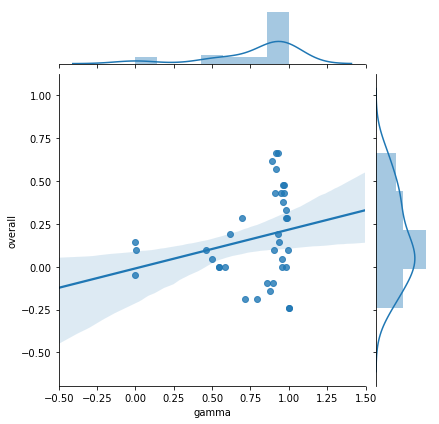

In [9]:
p = sns.jointplot(results['gamma'], all_induct_bias['overall'], kind='reg');
i = i.annotate(stats.pearsonr)
plt.xlabel('gamma')
plt.ylabel('bias')
plt.show()
#i.savefig('TesserScan_parse_overallbias.png', dpi = 300)

In [ ]:
i = sns.jointplot(results['tau'], all_induct_bias['overall'], kind='reg');
i = i.annotate(stats.pearsonr)
plt.xlabel('tau')
plt.ylabel('bias')
plt.show()
#i.savefig('TesserScan_parse_overallbias.png', dpi = 300)

## Get response probabilities for the fitted models

In [ ]:
res_list = []
for s in results.index.unique():
    subject = results.subject[s]
    subj_filter = f'SubjNum == {subject}'
    subj_induct = induct.query(subj_filter)
    subj_param = results.loc[s]
    param = {'gamma': subj_param['gamma'],
             'tau': subj_param['tau']}
    res = fit_limsr.assess_induct_fit_subject_limsr(adjacency, subj_induct, param)
    res_list.append(res)
fitted = pd.concat(res_list, axis=0)

In [ ]:
pd.set_option('display.max_rows', None)
fitted

In [ ]:
fitted.to_csv('individual_induct_LimSRmodel_trial_fits_alpha_free_gamma_free_gamma_free_tau.csv', index=False)

In [ ]:
high_perf_fitted = fitted.loc[fitted['SubjNum'].isin(high_perf_subj)]

In [ ]:
high_perf_fitted.to_csv('individual_induct_LimSRmodel_trial_fits_alpha_free_gamma_free_gamma_free_tau_highperf.csv', index=False)

# Plot individual differences in induction by environment

In [ ]:
m = fitted.groupby(['Source', 'SubjNum', 'Environment'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='Environment', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.plot((0, 1), (0, 1), '-k');

### high performers 

In [ ]:
m = high_perf_fitted.groupby(['Source', 'SubjNum', 'Environment'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='Environment', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.plot((0, 1), (0, 1), '-k');

# Plot individual differences in induction by question type

In [ ]:
m = fitted.groupby(['Source', 'SubjNum', 'QuestType'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='QuestType', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.plot((0, 1), (0, 1), '-k');
plt.savefig('TesserScan_vs_LimSRModel_QuestTypeBias_Corr_fits_alpha_free_gamma_free_gamma_free_tau.png', dpi = 300)
plt.savefig('TesserScan_vs_LimSRModel_QuestTypeBias_Corr_fits_alpha_free_gamma_free_gamma_free_tau.pdf', transparent = True)

### high performers

In [ ]:
m = high_perf_fitted.groupby(['Source', 'SubjNum', 'QuestType'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='QuestType', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.plot((0, 1), (0, 1), '-k');
plt.savefig('TesserScan_vs_LimSRModel_QuestTypeBias_Corr_fits_alpha_free_gamma_free_gamma_free_tau_highperf.png', dpi = 300)
plt.savefig('TesserScan_vs_LimSRModel_QuestTypeBias_Corr_fits_alpha_free_gamma_free_gamma_free_tau_highperf.pdf', transparent = True)

# Plot group means by enviornment

In [ ]:
m = fitted.groupby(['Source', 'SubjNum', 'Environment'])['Accuracy'].mean()
g = sns.catplot(kind='point', x='Environment', y='Accuracy', 
                hue='Source', dodge=True, data=m.reset_index())
g.set(ylim=(0, 1.02));

### high performers 

In [ ]:
m = high_perf_fitted.groupby(['Source', 'SubjNum', 'Environment'])['Accuracy'].mean()
g = sns.catplot(kind='point', x='Environment', y='Accuracy', 
                hue='Source', dodge=True, data=m.reset_index())
g.set(ylim=(0, 1.02));

# Plot group means by question type

In [ ]:
m = fitted.groupby(['Source', 'SubjNum', 'QuestType'])['Accuracy'].mean()
g = sns.catplot(kind='point', x='QuestType', y='Accuracy', 
                hue='Source', dodge=True, data=m.reset_index())
g.set(ylim=(0, 1.02));
plt.savefig('TesserScan_vs_LimSRModel_QuestTypeBias_Mean_fits_alpha_free_gamma_free_gamma_free_tau.png', dpi = 300)
plt.savefig('TesserScan_vs_LimSRModel_QuestTypeBias_Mean_fits_alpha_free_gamma_free_gamma_free_tau.pdf', transparent = True)

### high performers

In [ ]:
m = high_perf_fitted.groupby(['Source', 'SubjNum', 'QuestType'])['Accuracy'].mean()
g = sns.catplot(kind='point', x='QuestType', y='Accuracy', 
                hue='Source', dodge=True, data=m.reset_index())
g.set(ylim=(0, 1.02));
plt.savefig('TesserScan_vs_LimSRModel_QuestTypeBias_Mean_fits_alpha_free_gamma_free_gamma_free_tau_highperf.png', dpi = 300)
plt.savefig('TesserScan_vs_LimSRModel_QuestTypeBias_Mean_fits_alpha_free_gamma_free_gamma_free_tau_highperf.pdf', transparent = True)